In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 300
BATCH_SIZE = 32
CHANNEL = 3
EPOCHS = 15

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "casting_data",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 7204 files belonging to 2 classes.


In [4]:
class_names = dataset.class_names
class_names

['def_front', 'ok_front']

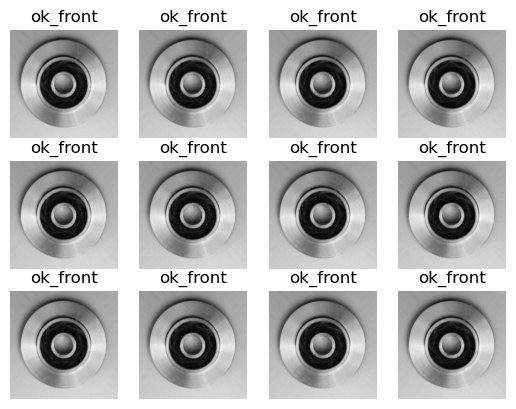

In [5]:
for images_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(images_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[0]])
        plt.axis('off')
    
    

In [6]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True,shuffle_size=10000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [7]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [8]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [9]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255),
])

In [10]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
])

In [11]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL)
num_classes = 2

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
        
    layers.Conv2D(16, (3,3), padding='same', activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
  
])

model.build(input_shape = input_shape)

c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 300, 300, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 300, 300, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 300, 300, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 150, 150, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 150, 150, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 75, 75, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 75, 75, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 37, 37, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 37, 37, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 18, 18, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 20736)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 128)              │     2,654,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 2)                │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,715,106 (10.36 MB)

 Trainable params: 2,715,106 (10.36 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [14]:
history = model.fit(
  train_ds,
  epochs =EPOCHS,
  batch_size = BATCH_SIZE,
  verbose=1,
  validation_data=val_ds
)

Epoch 1/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.5710 - loss: 0.7116 - val_accuracy: 0.7699 - val_loss: 0.4944
Epoch 2/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.7530 - loss: 0.4790 - val_accuracy: 0.8679 - val_loss: 0.2670
Epoch 3/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 173s 961ms/step - accuracy: 0.8685 - loss: 0.2941 - val_accuracy: 0.8338 - val_loss: 0.3819
Epoch 4/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.9229 - loss: 0.2011 - val_accuracy: 0.9545 - val_loss: 0.1289
Epoch 5/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.9587 - loss: 0.1277 - val_accuracy: 0.9730 - val_loss: 0.0843
Epoch 6/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.9735 - loss: 0.0797 - val_accuracy: 0.9616 - val_loss: 0.1051
Epoch 7/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - accuracy: 0.9793 - loss: 0.0616 - val_accuracy: 0.9787 - val_loss: 0.0648
Epoch 8/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.9688 - loss: 0.0925 - val_a

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

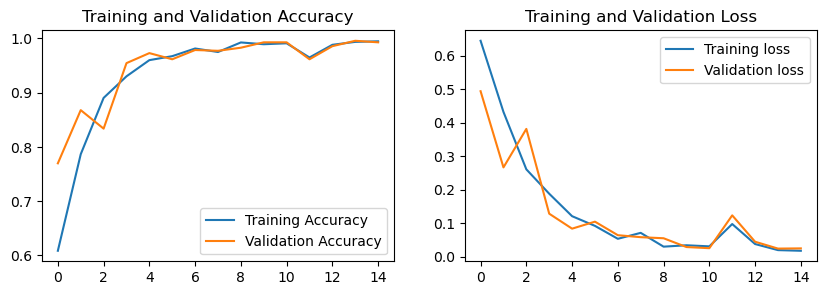

In [16]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS),val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label = 'Training loss')
plt.plot(range(EPOCHS),val_loss, label = 'Validation loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")
plt.show()

first Image to Predict
First image's actual label : def_front
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
Predicted label: def_front


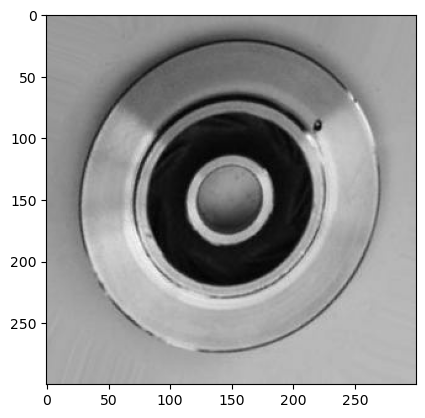

In [39]:
# Prototype of predition code 
for images_batch, label_batch in dataset.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    first_label = label_batch[0]
    
    print("first Image to Predict")
    plt.imshow(first_image)
    print("First image's actual label :",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    
print("Predicted label:",class_names[np.argmax(batch_prediction[0])])

In [17]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    
    return predicted_class, confidence

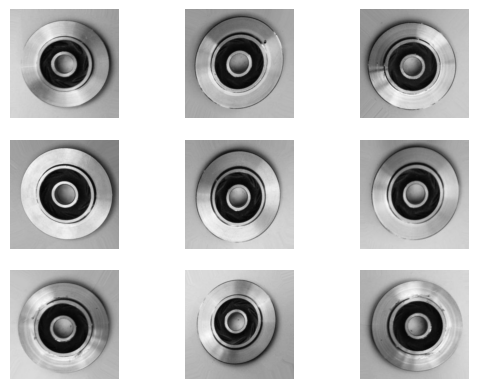

In [18]:
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


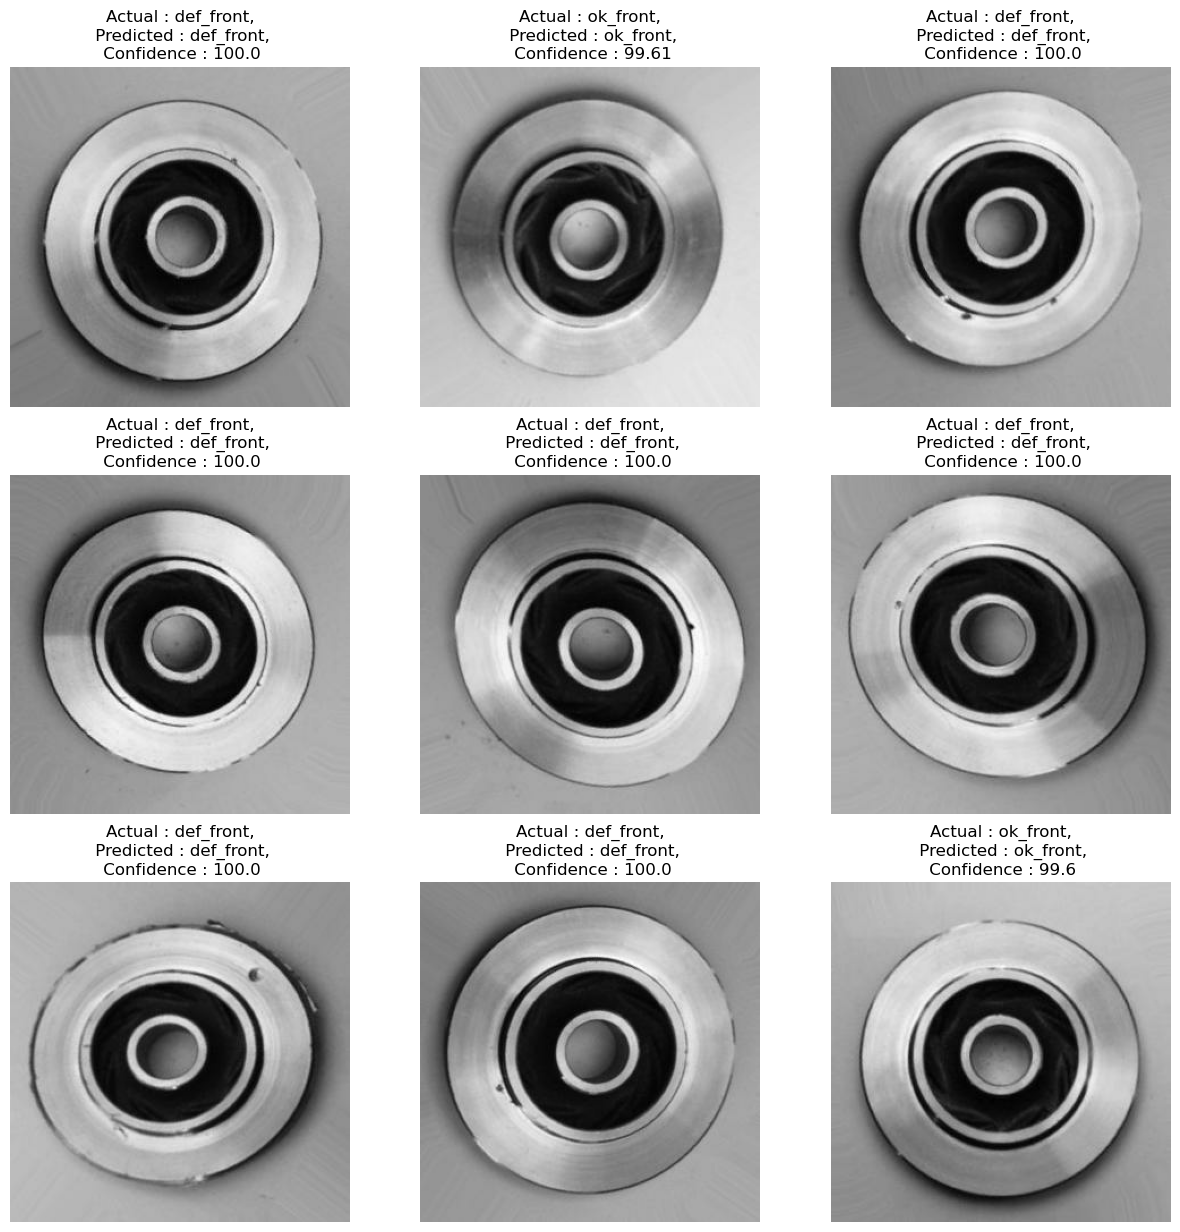

In [19]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual : {actual_class},\n Predicted : {predicted_class},\n Confidence : {confidence}")
        
        plt.axis("off")

In [24]:
# Save the entire model as a `.keras` zip archive.
from tensorflow.keras.models import load_model

model.save('./Saved_Models/model1.keras')

In [25]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('./Saved_Models/my_model.keras')

# Show the model architecture
new_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 300, 300, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 300, 300, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 300, 300, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 150, 150, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 150, 150, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 75, 75, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 75, 75, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 37, 37, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 37, 37, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 18, 18, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 20736)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 128)              │     2,654,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 2)                │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,145,320 (31.07 MB)

 Trainable params: 2,715,106 (10.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,430,214 (20.71 MB)